# Team 6 - World Cup

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Is there a way to integrate the data from all 3 datasets?
- It seems like the `winners` dataset doesn't have data of World Cup 2018. Can you Google the relevant information and add it to the dataset using `pandas`?
- The format of some number columns in `matches` dataset doesn't look right.
- Can you seperate the Date and the Time of `Datetime` column in `matches` dataset?
- And more...

In [4]:
import pandas as pd
import seaborn as sns
df1 = pd.read_csv('players.csv')
df2 = pd.read_csv('winners.csv')
df3 = pd.read_csv('matches.csv')


In [5]:
df1.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [6]:
#insert new row
new_row = {'Year':'2018', 'Country':'Russia', 'Winner':'France', 'Runners-Up':'Croatia', 'Third':'Belgium', 'Fourth':'England', 'GoalsScored':169, 'QualifiedTeams':32, 'MatchesPlayed':64, 'Attendance':'3.031.768'}
df2 = df2.append(new_row, ignore_index=True)

In [7]:
#convert attendance to int
a = df2.Attendance.values
b = []
i = 0
while i<21:
    b.append(int(a[i].replace('.','')))
    i+=1
df2 = df2.drop(['Attendance'], axis = 1)
df2['Attendance'] = b

In [8]:
#20 kỳ wc, 16 số quốc gia đăng cai
df2['Country'].value_counts().count()

16

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Goal/match
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3587538,2.711538


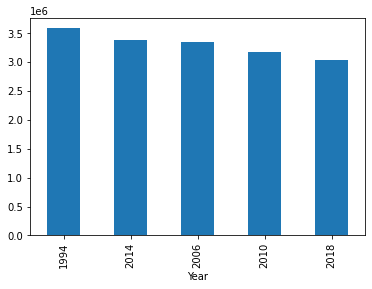

In [38]:
#số lượng người theo dõi lớn nhất
df2.groupby('Year').sum()['Attendance'].sort_values(ascending=False).head(5).plot(kind='bar')
df2[df2.Attendance == df2['Attendance'].max()] 

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Goal/match
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2785100,2.671875
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3386810,2.671875


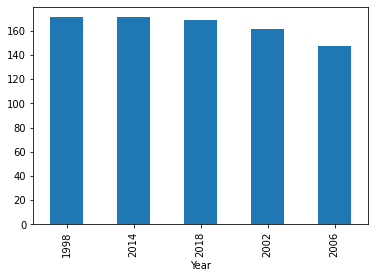

In [39]:
#số bàn nhiều nhất trong một mùa
df2.groupby('Year').sum()['GoalsScored'].sort_values(ascending=False).head(5).plot(kind='bar')
df2[df2.GoalsScored == df2['GoalsScored'].max()] 

In [11]:
#hiệu suất số bàn/trận từng năm
a = df2.GoalsScored.values
b = df2.MatchesPlayed.values
i = 0
c = []
while i<21:
    c.append(a[i]/b[i])
    i+=1
df2['Goal/match'] = c
df2

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Goal/match
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,4.666667
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,4.000000
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,5.384615
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810,3.600000
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172,2.781250
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135,2.781250
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975,2.968750
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753,2.552632


Brazil        5
Italy         4
Germany FR    3
France        2
Argentina     2
Name: Winner, dtype: int64

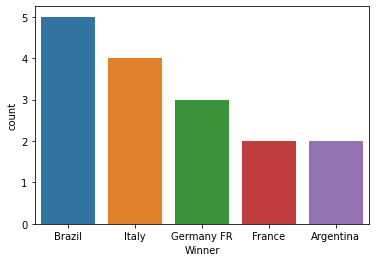

In [52]:
#5 đội tuyển vô địch nhiều nhất
sns.countplot(x = "Winner", data=df2, order = df2['Winner'].value_counts().head(5).index)
df2['Winner'].value_counts().head(5)

In [13]:
#rename players.csv column
df1 = df1.rename(columns={"Team Initials": "Team_Initials", "Coach Name": "Coach_Name", "Line-up": "Line_up","Shirt Number": "Shirt_Number","Player Name": "Player_Name"})

In [14]:
#trận đấu có nhiều người xem nhất
df3[df3.Attendance == df3['Attendance'].max()] 

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
74,1950.0,16 Jul 1950 - 15:00,Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,,173850.0,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA


RONALDO           26
KLOSE             25
LAHM              24
OSCAR             23
SCHWEINSTEIGER    22
Name: Player_Name, dtype: int64

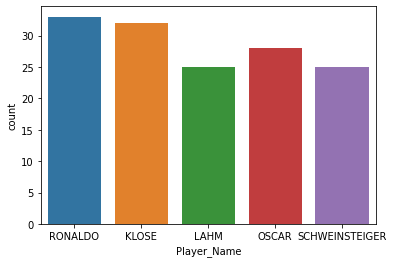

In [56]:
#top5 cầu thủ tham gia nhiều trận đấu nhất
sns.countplot(x = "Player_Name", data=df1, order = df1[df1.Line_up == "S"]['Player_Name'].value_counts().head(5).index)
df1[df1.Line_up == "S"]['Player_Name'].value_counts().head(5)

In [57]:
df3.head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [17]:
df1.head(5)

,RoundID,MatchID,Team_Initials,Coach_Name,Line_up,Shirt_Number,Player_Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [18]:
df2.head(5)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Goal/match
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,4.666667
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,4.000000
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,5.384615


In [58]:
#Những trận đấu có nhiều bàn thắng nhất
df3 = df3.rename(columns={"Home Team Goals": "Home_Team_Goals", "Away Team Goals": "Away_Team_Goals"})

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home_Team_Goals,Away_Team_Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [59]:
df3[df3.Home_Team_Goals == df3['Home_Team_Goals'].max()] 

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home_Team_Goals,Away_Team_Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
312,1982.0,15 Jun 1982 - 21:00,Group 3,Nuevo Estadio,Elche,Hungary,10.0,1.0,El Salvador,,23000.0,3.0,0.0,AL DOY Ebrahim (BHR),CORVER Charles (NED),LUND-SORENSEN Henning (DEN),293.0,896.0,HUN,SLV


In [61]:
df3[df3.Away_Team_Goals == df3['Away_Team_Goals'].max()].head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home_Team_Goals,Away_Team_Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
246,1974.0,19 Jun 1974 - 19:30,Group 4,Olympiastadion,Munich,Haiti,0.0,7.0,Poland,,25300.0,0.0,5.0,SUPPIAH George (SIN),BIWERSI Ferdinand (GER),ESCHWEILER Walter (GER),262.0,2085.0,HAI,POL
826,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
